In [ ]:
import tensorflow as tf

In [1]:
# TO WORK TENSORFLOW SUCCESSFULLY ON GPU'S
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
tf.__version__

NameError: ignored

In [ ]:
!nvidia-smi

In [3]:
from tensorflow.keras.layers import Dense,Flatten,Input,Conv2D,MaxPooling2D,Dropout
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# SETTING OUT DATA PATHS
train_path='/content/drive/MyDrive/dataset/train'
test_path='/content/drive/MyDrive/dataset/test'
val_path='/content/drive/MyDrive/dataset/valid'

In [5]:
from glob import glob

In [6]:
# TO KNOW NUMBER OF CLASSES
folders=glob(train_path+'/*')
folders

['/content/drive/MyDrive/dataset/train/without_mask',
 '/content/drive/MyDrive/dataset/train/with_mask']

In [7]:
# DATA AUGMENTATION

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                   fill_mode='nearest')
val_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
# retrieval of images
train_set=train_datagen.flow_from_directory(train_path,target_size=(200,200),batch_size=128,class_mode='binary')
val_set=val_datagen.flow_from_directory(val_path,target_size=(200,200),batch_size=128,class_mode='binary')


Found 3649 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [12]:
from tensorflow import keras
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])
 
 
# compile cnn model
cnn_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
 
# train cnn model
history = cnn_model.fit(train_set, 
                          epochs=10, 
                          verbose=1, 
                          validation_data= val_set) # time start 14.25
 
cnn_model.save('/content/drive/MyDrive/model_last.h5')
 



Epoch 1/10
18/29 [=================>............] - ETA: 8:31 - loss: 0.6650 - accuracy: 0.5738

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 1612s 56s/step - loss: 0.6167 - accuracy: 0.6296 - val_loss: 0.2456 - val_accuracy: 0.9194
Epoch 2/10
29/29 [==============================] - 46s 2s/step - loss: 0.3221 - accuracy: 0.8751 - val_loss: 0.1811 - val_accuracy: 0.9367
Epoch 3/10
29/29 [==============================] - 45s 2s/step - loss: 0.3001 - accuracy: 0.8888 - val_loss: 0.2194 - val_accuracy: 0.9206
Epoch 4/10
29/29 [==============================] - 46s 2s/step - loss: 0.2788 - accuracy: 0.8995 - val_loss: 0.2041 - val_accuracy: 0.9280
Epoch 5/10
29/29 [==============================] - 45s 2s/step - loss: 0.2714 - accuracy: 0.8947 - val_loss: 0.1544 - val_accuracy: 0.9479
Epoch 6/10
29/29 [==============================] - 45s 2s/step - loss: 0.2681 - accuracy: 0.9002 - val_loss: 0.1638 - val_accuracy: 0.9429
Epoch 7/10
29/29 [==============================] - 45s 2s/step - loss: 0.2621 - accuracy: 0.9077 - val_loss: 0.1528 - val_accuracy: 0.9417
Epoch 8/10
29/29 [==========

In [13]:
import matplotlib.pyplot as plt


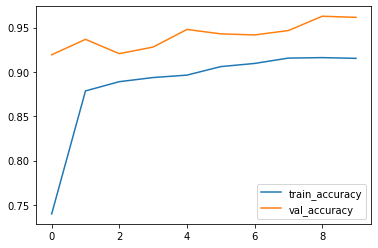

In [20]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

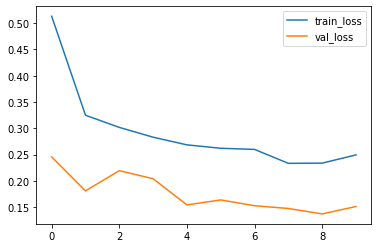

In [21]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()